In [4]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
def sort(x,y):
  if x<y:
    return x,y
  else:
    return y,x

def trisurf_plot(mat,color = "blue",alpha = 0.5):
  for arrow in mat:
    arrow = np.array(arrow)
    ax.plot_trisurf(arrow[:, 0], arrow[:, 1], arrow[:, 2], alpha = alpha, color = color)


def edges_plot(li,color = "green", alpha = 0.7,linewidth = 1):
  for endpoints in li:
      ax.plot(endpoints[:, 0], endpoints[:, 1], endpoints[:, 2], alpha = alpha, color = color)

def vers_plot( vers ,color= "red", alpha = 1.0, marker = 'o'):
  for ver in vers:
    ax.plot(ver[0],ver[1],ver[2],marker = marker, color = color)

def make_graph(mesh,scale=1.0):
  """
  arg : <class 'open3d.cpu.pybind.geometry.TriangleMesh'>(returns of open3d.io.read_triangle_mesh)

  return : np.array of shape (the num of edges) x 3. 
    edges[edges idx][0] = (int) an index of an endpoint
    edges[edges idx][1] = (int) an index of the other endpoint.
    edges[edge idx][2] = (int) weight of edge 
  """
 
  di = {}

  for tri in np.asarray(mesh.triangles):
    di[tri[0]] = set()
    di[tri[1]] = set()
    di[tri[2]] = set()

  for tri in np.asarray(mesh.triangles):
    for p,q in [(1,0),(1,2),(2,0)]:
      x,y = sort(tri[p],tri[q])
      di[x].add(y)

  edges = []

  for cod in di.keys():
    for dom in di[cod]:
      edges.append([cod,dom])


  for i in range(len(edges)):
    cod = edges[i][0]
    dom = edges[i][1]
    d = np.linalg.norm((vers[cod]-vers[dom]))
    edges[i].append(int(d*scale))

  return edges

def mesh2status(mesh):
  """
  arg : <class 'open3d.cpu.pybind.geometry.TriangleMesh'>(returns of open3d.io.read_triangle_mesh)

  output : 
    vers: np.array of shape (the num of vertices) x 3. vers[vertices index][axis]
    edges: np.array of shape (the num of edges) x 2 x 3. edges[edges index][endopoints][axis]
    tris: np.array of shape (the num of triangles) x 3 x 3. tris[triangle index][vertex of triangle][axis]
  """
  # calc vers

  vers = np.array(mesh.vertices)

  # calc edges
  graph = make_graph(mesh)
  edges = []
  for edge in graph:
    edges.append(np.array([vers[edge[0]],vers[edge[1]]]))


  # calc tris

  tris = []
  for triangle in mesh.triangles:
    mat = []
    for idx in triangle:
      mat.append((mesh.vertices)[idx])
    mat = np.array(mat)
    tris.append(mat)

  return vers, edges, tris




# Load PLY and make vertices, edges, and triangles with componets.


In [7]:
path = "/content/drive/MyDrive/airplane-analytics/"
ply_path = path+"data/helix.ply"

mesh = o3d.io.read_triangle_mesh(ply_path)

vers, edges , tris = mesh2status(mesh)

triangles :  6400
vertices :  3240
edges :  9640


# Plot polygons by triangles: np.array

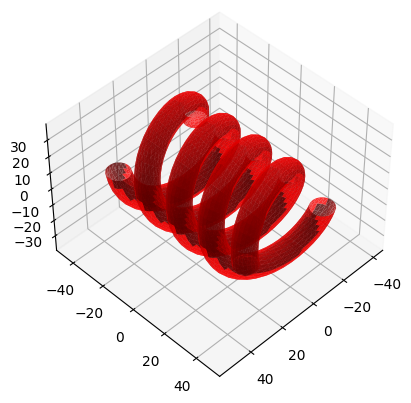

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
trisurf_plot(tris, color = "red", alpha = 0.8)
ax.view_init(elev = 45,azim = 45)
ax.axis("equal")
plt.show()

# Plot edges and points by using edges_plot


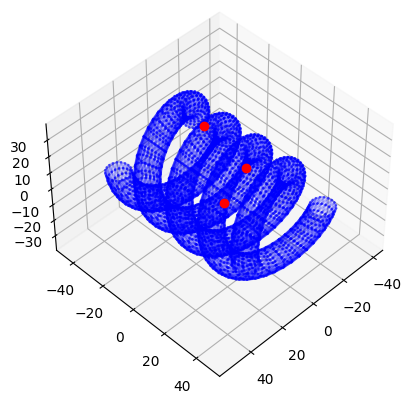

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")

# plot edges
edges_plot(edges,alpha = 0.3,color = "blue",linewidth = 1)

# plot vers
cut_vers =  np.array([vers[0], vers[100], vers[600]])
vers_plot(cut_vers)

ax.axis("equal")
ax.view_init(elev = 45,azim = 45)
plt.show()

# Make txt file for dijkstra1-path.c and dijkstra2-path

In [10]:
scale = 100
graph = make_graph(mesh,scale)

filename = path+"/data/output.txt"  # 出力ファイル名

with open(filename, "w") as file:
    file.write(str(len(mesh.vertices))+" "+"V="+str(len(mesh.vertices))+" E="+str(len(graph))+"\n")
    for row in graph:
        row_str = " ".join(str(element) for element in row)  # 空白区切りの文字列に変換
        file.write(row_str + "\n")  # ファイルに書き込み

print("ファイルに書き込みが完了しました。")

edges :  9640
ファイルに書き込みが完了しました。


# Plot path from the resut of dijkstra1-path.c or dijkstra2-path.c

In [12]:
# route is the result of dijkstra code
route = [312,231,139,138,1608,1527,1446,1365,1364,1363,1362,1361,1360,1359,1358,1357,1356,1355,1354,1353,1352,1351,1350,1349,1348,1347,1346,1345,1344,1343,1342,1341,1340,1339,1338,1337,1336,1335,1334,1333,1332,1331,1330,1329,1328,1327,1326,1325,1324,1323,1322,1321,1320,1319,1318,1317,1316,1315,1314,1313,1312,1311,1310,1309,1308,1307,1306,1305,1304,1303,1302,1301,1300,1380,1460,1540,0]

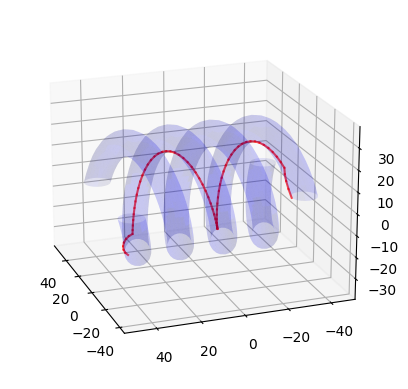

In [13]:
edge_path = [] # for plot
for i in range(len(route)-1):
  edge_path.append([vers[route[i]],vers[route[i+1]]])
edge_path= np.array(edge_path)

fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
edges_plot(edge_path,color = "red")
trisurf_plot(tris,alpha = 0.1)
ax.axis("equal")
ax.view_init(elev=20, azim=160)
plt.show()